In [149]:
import pandas as pd
import seaborn as sns
import json

In [150]:
df = pd.read_csv('desafio1.csv')

In [151]:
df.head(10)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1
5,6,db5cf32c3fbc7c5d8f8313afca1d099de6dc055f,a596384ca70664af4c5fac9f935cff186b8e8bc0,645,RS,M,44,8,113755.78,2,1,0
6,7,8f3cc64a0a84bab38fefb030f09757d0cbf03bb2,abec3e525ab40e45975c91d4fa2bc7b318d93de4,822,SC,M,50,7,0.00,2,1,1
7,8,6704b822c203e2dda9f225dfc4f1bed2ae9044e6,336b42483e6a17f48eb040a251b5d6e64d1351a9,376,PR,F,29,4,115046.74,4,1,0
8,9,35f41954a87f722a3960e5fa8ce898a09398a564,53a417796c777851003b3f2431e8eef5625ec15b,501,SC,M,44,4,142051.07,2,0,1
9,10,f110be36fc6171a7da472b9cbac8698df880aac6,b89d09fc7719cb3c4a87e4a61cb87b3465e9d8ff,684,SC,M,27,2,134603.88,1,1,1


### Existe correlação forte positiva de credito e o saldo da conta?

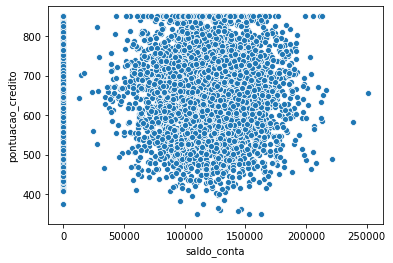

In [152]:
sns.scatterplot(x = 'saldo_conta', y = 'pontuacao_credito', data=df)

In [153]:
df.estado_residencia.value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

In [154]:
estado = list(df['estado_residencia'].unique())

In [175]:
def metodos(est):
    aux = df[df['estado_residencia']==est]
    data = {
        'moda': float(aux['pontuacao_credito'].mode()[0]),
        'mediana': aux['pontuacao_credito'].median(),
        'media' : aux['pontuacao_credito'].mean(),
        'desvio_padrao' :aux['pontuacao_credito'].std() 
        }
    return data

In [176]:
data = {
    'SC': metodos('SC'),
    'RS': metodos('RS'),
    'PR': metodos('PR')
}

In [177]:
with open('submission.json', 'w') as write_file:
    json.dump(data, write_file)